In [1]:
%matplotlib inline

# dataframes and arrays
import pandas as pd, numpy as np

# uncertainties
#from uncertainties import ufloat

# for plotting
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

###
# VISCOSITY OF CRYSTAL-BEARING MELTSc
###
from scipy.special import erf
def costa_(xi, PHY, PHY_C, gamma, A=13.0, B=2.5):
    
    delta = A - gamma
    phy = PHY/PHY_C
    
    F = (1-xi)*erf((np.sqrt(np.pi)/(2*(1-xi)))*phy*(1+phy**gamma))
    
    num = 1+phy**delta
    denom = (1-F)**(B*PHY_C)
    
    return num/denom
    
import astropy.units as u
from astropy.constants import G, h, k_B, c

###
# TEMPERATURE 
###
def calculate_T_surface(longitude = np.arange(-180,180,1)*u.degree, 
                        epsilon_5_over_2 = 1.0,
                        R_star = 0.943*u.solRad,
                        d_star = 0.01544*u.AU,
                        T_star = 5172.0*u.Kelvin,
                        nightside_T = 1045.0*u.Kelvin):

    T_surf = (epsilon_5_over_2**0.25) *((R_star.si/d_star.si)**0.5)*(np.cos(longitude.si)**0.25)*T_star
    T_surf = np.nan_to_num(T_surf,0)
    T_surf[T_surf < nightside_T] = nightside_T
    return T_surf


/var/folders/23/p99d2kmd0vlg5qrqb4vq2q840000gn/T/ipykernel_1936/2293060230.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd, numpy as np


In [2]:
T_min_D2016a = ufloat(1273, 350)
T_min_D2016b = ufloat(1380, 400)
T_min_M2022 = ufloat(1045, 300)

from uncertainties import umath

(T_min_D2016a+T_min_D2016b+T_min_M2022)/3

NameError: name 'ufloat' is not defined

# we load the result (see in imelt folder for the calculation)

Peridotite viscosity calculated with greybox model 1

CA viscosity was calculated using i-Melt v2 for now.

/Users/charleslelosq/anaconda3/envs/gpflow/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


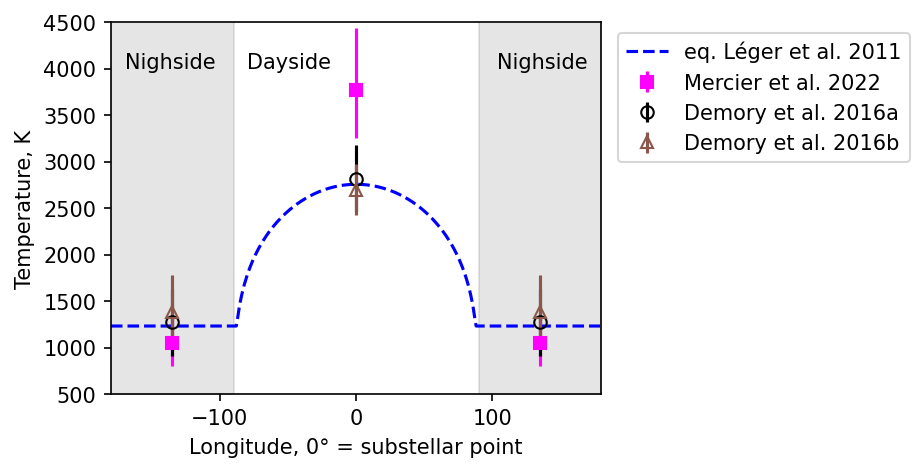

In [4]:
#Longitude_axis = np.linspace(-109.8, 109.8, 2123)
Longitude_axis = np.arange(-180,180,1.0)


longitude = np.arange(-180,180,1)*u.degree
profile_temperature = calculate_T_surface(nightside_T=1232*u.Kelvin)#np.load("./data/T_cancri.npy")
profile_temperature_noshift = calculate_T_surface(nightside_T=0.0*u.Kelvin)
Cancri_result = pd.read_csv("./data/Cancri_calcul.csv")
Cancri_result_CA = pd.read_csv("./data/Cancri_calcul_CA.csv")

###
# Figure for temperature
###

plt.figure(figsize=(4.22,3.22), dpi=150)
plt.plot(longitude,profile_temperature, "b--", label="eq. Léger et al. 2011")
plt.errorbar(np.array([[0]]),
             np.array([[3771]]), 
             yerr=np.array([[520],[669]]),
             marker="s", 
             linestyle="none",
             color="magenta", label="Mercier et al. 2022")

plt.errorbar(0,2816,yerr=360,marker="o", mfc="none", c = "black", linestyle="none", label="Demory et al. 2016a")
plt.errorbar(0,2700,yerr=270,marker="^", mfc="none", c = "C5", linestyle="none", label="Demory et al. 2016b")
plt.legend(bbox_to_anchor=(1.65, 1.0))

plt.errorbar(np.array([[-90-45],[90+45]]),
             np.array([[1045],[1045]]), 
             yerr=np.array([[243],[302]]),
             marker="s", 
             linestyle="none",
             color="magenta", label="M2022")

plt.errorbar(-135,1273,yerr=360,marker="o", mfc="none", c = "black", label="D2016a")
plt.errorbar(+135,1273,yerr=360,marker="o", mfc="none", c = "black", label="D2016a")
plt.errorbar(-135,1380,yerr=400,marker="^", mfc="none", c = "C5", label="D2016b")
plt.errorbar(+135,1380,yerr=400,marker="^", mfc="none", c = "C5", label="D2016b")

plt.fill_betweenx([500,5000],-180,-90, color="grey", alpha=0.2)
plt.fill_betweenx([500,5000],90,180, color="grey", alpha=0.2)

plt.xlim(-180, 180)
plt.ylim(500,4500)

plt.annotate("Nighside", xy=(-170, 4000))
plt.annotate("Dayside", xy=(-80, 4000))
plt.annotate("Nighside", xy=(170, 4000), ha="right")

plt.ylabel("Temperature, K")
plt.xlabel("Longitude, 0° = substellar point")
#plt.tight_layout()
plt.savefig("./figures/Cancri_temperature_profile.pdf", bbox_inches="tight")

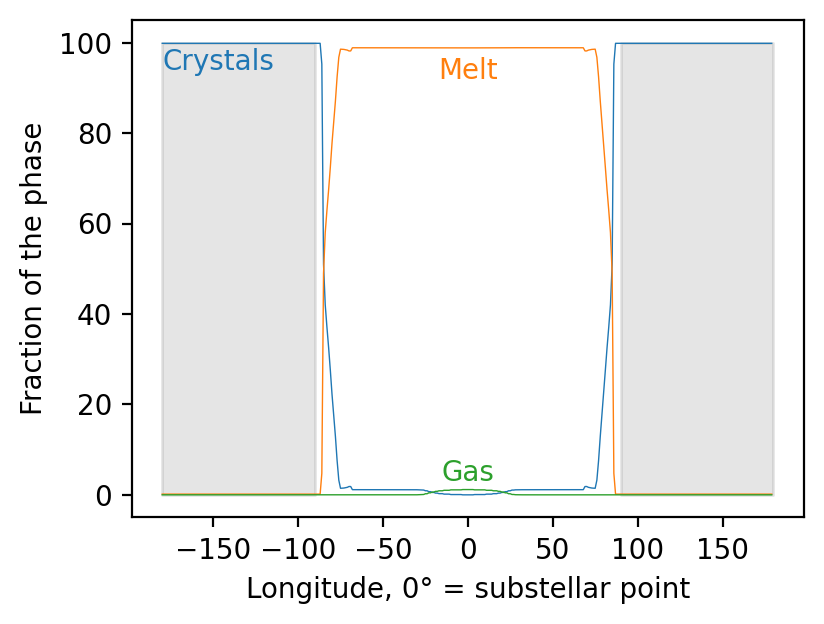

In [49]:
plt.figure(figsize=(4.22,3.22), dpi=200)
plt.plot(Longitude_axis, Cancri_result.loc[:,"prct_c"], "-", linewidth=0.5)
plt.plot(Longitude_axis, Cancri_result.loc[:,"prct_l"], "-", linewidth=0.5)
plt.plot(Longitude_axis, Cancri_result.loc[:,"prct_g"], "-", linewidth=0.5)

#plt.plot(Longitude_axis, Cancri_result_CA.loc[:,"prct_c"]*100, "-")
#plt.plot(Longitude_axis, Cancri_result_CA.loc[:,"prct_l"]*100, "-")
plt.xlabel("Longitude, 0° = substellar point")
plt.ylabel("Fraction of the phase")
plt.annotate("Crystals", xy=(-180, 94), xycoords="data", color="C0", ha="left")
plt.annotate("Melt", xy=(0, 92), xycoords="data", color="C1", ha="center")
plt.annotate("Gas", xy=(0, 3), xycoords="data", color="C2", ha="center")

plt.fill_betweenx([0,100],-180,-90, color="grey", alpha=0.2)
plt.fill_betweenx([0,100],90,180, color="grey", alpha=0.2)

plt.tight_layout()
plt.savefig("./figures/Cancri_Phases_profile.pdf")

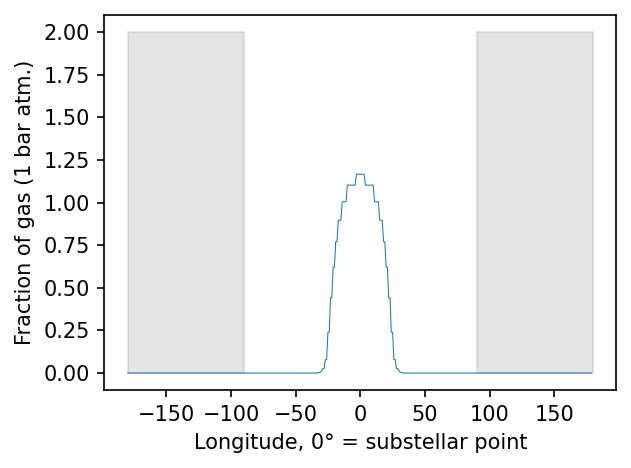

In [51]:
plt.figure(figsize=(4.22,3.22), dpi=150)
plt.plot(Longitude_axis, Cancri_result.loc[:,"prct_g"], "-", linewidth=0.5)
plt.fill_betweenx([0,2],-180,-90, color="grey", alpha=0.2)
plt.fill_betweenx([0,2],90,180, color="grey", alpha=0.2)

plt.xlabel("Longitude, 0° = substellar point")
plt.ylabel("Fraction of gas (1 bar atm.)")
plt.tight_layout()
plt.savefig("./figures/Cancri_Gas_profile.pdf")

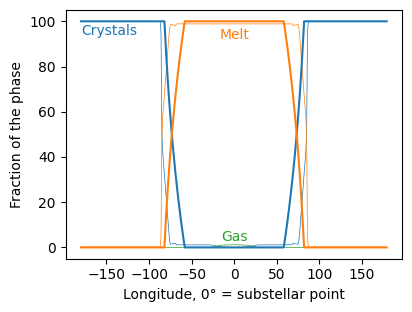

In [21]:
plt.figure(figsize=(4.22,3.22))
plt.plot(Longitude_axis, Cancri_result.loc[:,"prct_c"], "-", linewidth=0.5)
plt.plot(Longitude_axis, Cancri_result.loc[:,"prct_l"], "-", linewidth=0.5)
plt.plot(Longitude_axis, Cancri_result.loc[:,"prct_g"], "-", linewidth=0.5)

plt.plot(Longitude_axis, Cancri_result_CA.loc[:,"prct_c"]*100, "-", color="C0")
plt.plot(Longitude_axis, Cancri_result_CA.loc[:,"prct_l"]*100, "-", color="C1")
plt.xlabel("Longitude, 0° = substellar point")
plt.ylabel("Fraction of the phase")
plt.annotate("Crystals", xy=(-180, 94), xycoords="data", color="C0", ha="left")
plt.annotate("Melt", xy=(0, 92), xycoords="data", color="C1", ha="center")
plt.annotate("Gas", xy=(0, 3), xycoords="data", color="C2", ha="center")
plt.tight_layout()
plt.savefig("./figures/Cancri_Phases_profile_plusRefractory.pdf")

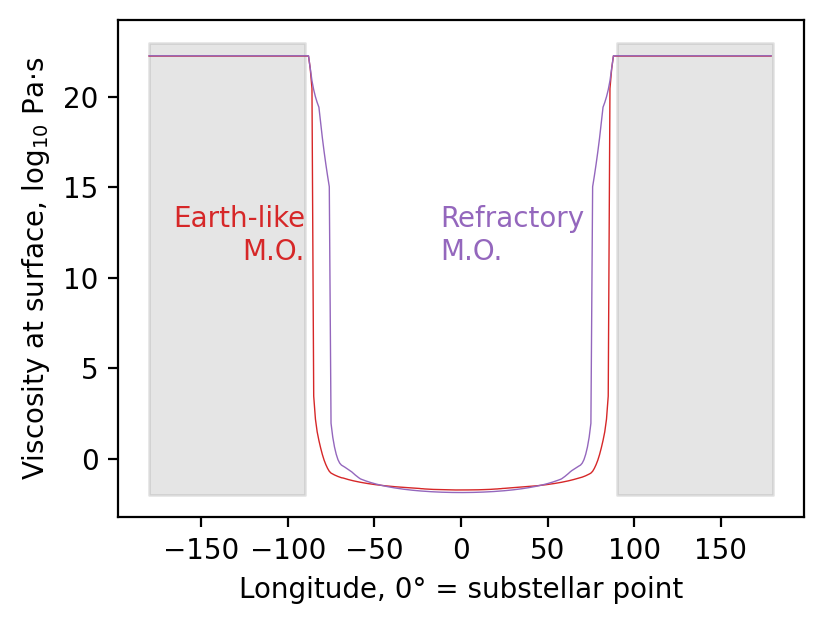

In [68]:
# we use a nearest neighbors algorithm to map RGB to fraction
#interp = KNeighborsRegressor(n_neighbors=4, weights='distance')

visco_ = Cancri_result.loc[:,"Cancri_visco"]
ctx_ = Cancri_result.loc[:,"prct_c"]

#clf.fit(Longitude_axis, visco_)

#Longitude = np.arange(Longitude_axis.min(), Longitude_axis.max(), 

plt.figure(figsize=(4.22,3.22), dpi=200)
plt.plot(Longitude_axis, visco_, "-", linewidth=0.5, color="C3")
plt.annotate("Earth-like\nM.O.", xy=(-90,11), xycoords="data", color="C3", ha="right")
plt.fill_betweenx([-2,23],-180,-90, color="grey", alpha=0.2)
plt.fill_betweenx([-2,23],90,180, color="grey", alpha=0.2)

plt.xlabel("Longitude, 0° = substellar point")
plt.ylabel("Viscosity at surface, log$_{10}$ Pa$\cdot$s")
plt.tight_layout()
plt.savefig("./figures/Cancri_Viscosity_profile.pdf")

plt.plot(Longitude_axis, Cancri_result_CA.Cancri_visco, "-", linewidth=0.5, color="C4")
plt.annotate("Refractory\nM.O.", xy=(-12,11), xycoords="data", color="C4")
plt.savefig("./figures/Cancri_Viscosity_profile_2.pdf")

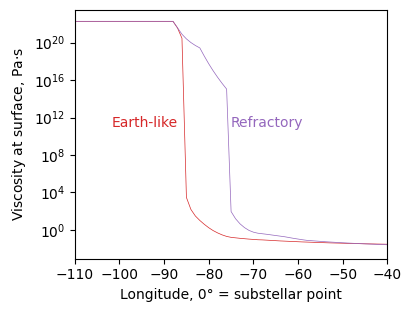

In [31]:
plt.figure(figsize=(4.22,3.22))
plt.plot(Longitude_axis, 10**visco_, "-", linewidth=0.5, color="C3")
plt.plot(Longitude_axis, 10**Cancri_result_CA.Cancri_visco, "-", linewidth=0.5, color="C4")
plt.annotate("Earth-like", xy=(-87,10**11), xycoords="data", color="C3", ha="right")
plt.annotate("Refractory", xy=(-75,10**11), xycoords="data", color="C4")
plt.xlabel("Longitude, 0° = substellar point")
plt.ylabel("Viscosity at surface, Pa$\cdot$s")
plt.yscale("log")
plt.xlim(-110,-40)
plt.tight_layout()
plt.savefig("./figures/Cancri_Viscosity_profile_zoom.pdf")

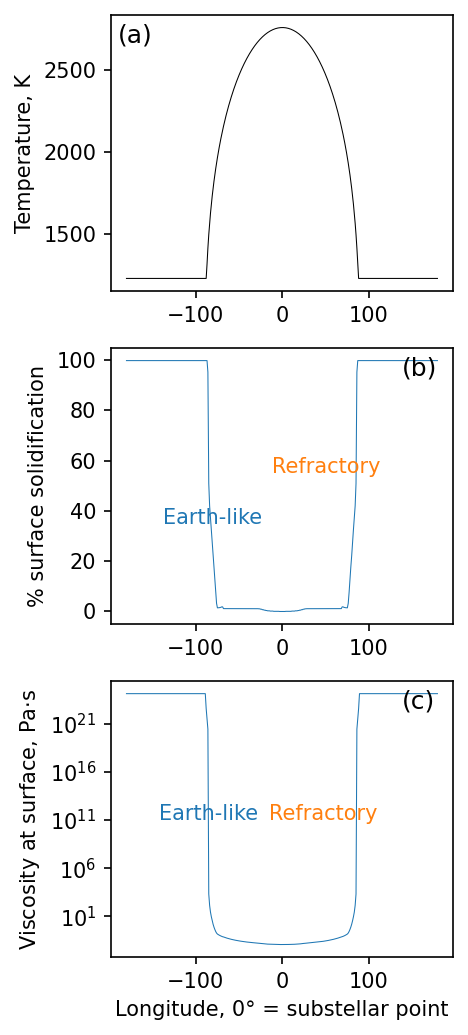

In [60]:
plt.figure(figsize=(3.22,7), dpi=150)

plt.subplot(3,1,1)
plt.plot(Longitude_axis, profile_temperature, "k-", linewidth=0.5)
#plt.xlabel("Longitude, 0° = substellar point")
plt.ylabel("Temperature, K")
plt.annotate("(a)", xy=(0.02,0.9), xycoords="axes fraction", 
             ha="left", fontsize=12)

plt.subplot(3,1,2)
plt.plot(Longitude_axis, Cancri_result.loc[:,"prct_c"], "-", linewidth=0.5, color="C0")
#plt.plot(Longitude_axis, Cancri_result_CA.loc[:,"prct_c"]*100, "-", linewidth=0.5, color="C1")
plt.annotate("Earth-like", xy=(-23,35), xycoords="data", color="C0", ha="right")
plt.annotate("Refractory", xy=(-12,55), xycoords="data", color="C1")
plt.ylabel("% surface solidification")
plt.annotate("(b)", xy=(0.85,0.9), xycoords="axes fraction", 
             ha="left", fontsize=12)
#plt.xlim(-60,40)

plt.subplot(3,1,3)
plt.plot(Longitude_axis, 10**visco_, "-", linewidth=0.5, color="C0")
#plt.plot(Longitude_axis, 10**Cancri_result_CA.Cancri_visco, "-", linewidth=0.5, color="C1")
plt.annotate("Earth-like", xy=(-28,10**11), xycoords="data", color="C0", ha="right")
plt.annotate("Refractory", xy=(-15,10**11), xycoords="data", color="C1")
plt.xlabel("Longitude, 0° = substellar point")
plt.ylabel("Viscosity at surface, Pa$\cdot$s")
plt.yscale("log")
plt.annotate("(c)", xy=(0.85,0.9), xycoords="axes fraction", 
             ha="left", fontsize=12)
#plt.xlim(-60,40)
plt.tight_layout()
plt.savefig("./figures/Cancri_percent_solidification.pdf")